### Package and Data Imports

In [1]:
#Importing packages
import math #Various math
import numpy as np #Linear algebra
import scipy #Optimization
import scipy.optimize as sco #Portfolio optimization
from pandas_datareader import data #Package for pulling data from the web
import matplotlib.pyplot as plt #Basic plotting package
import matplotlib.patches as mpatches #Colorscale help
import seaborn as sns #Enhanced plots
sns.set_style('darkgrid') #Plot styling
import pandas as pd #Dataframes
import statistics #Stats
from datetime import date #System clock

#Defining the countries we're interested in (iShares MSCI ETFS)
etf_tickers = ['EWG','EWU','EWL','EWQ','ERUS','EWP','EWI','TUR','EWN','EWD','EDEN','EIRL','EWO','EWK','EPOL']

#EWG = Germany, EWU = UK, EWL = Switzerland, EWQ = France, ERUS = Russia, EWP = Spain, EWI = Italy, TUR = Turkey,
    #EWN = Netherlands, EWD = Sweden, EDEN = Denmark, EIRL = Ireland, EWO = Austria, EWK = Belgium, EPOL = Poland
               

#Getting the most up to date data we can
today = date.today() #This function automatically updates with today's data


#Pulling the timeseries data directly from yahoo finance into a dataframe
etf_data= data.DataReader(etf_tickers, 
                       start='2019-1-1', #selecting the starting date
                       end = today, #charting up to today's date
                       data_source='yahoo')['Adj Close'] #obtaining price at close

#Checking the 20 most recent values
etf_data.head(10)

Symbols,EWG,EWU,EWL,EWQ,ERUS,EWP,EWI,TUR,EWN,EWD,EDEN,EIRL,EWO,EWK,EPOL
Date,,,,,,,,,,,,,,,
2019-01-02,24.233761,27.673256,30.155510,25.428503,28.851210,25.640833,22.929949,22.899082,25.371155,26.490206,55.236572,36.037548,17.750546,15.630350,22.315073
2019-01-03,23.915909,27.503420,30.136229,25.060955,28.915487,25.698088,22.806517,22.047777,24.917065,26.108641,54.839046,36.124996,17.857012,15.630350,21.871086
2019-01-04,24.811672,28.267668,30.888187,25.738016,29.870459,26.346981,23.642059,23.243425,25.583708,27.177021,56.264317,37.388103,18.447405,16.053572,22.344025
2019-01-07,24.850199,28.267668,30.830345,25.815395,29.907190,26.642799,23.936396,23.090385,25.815582,27.463200,57.078758,37.669876,18.708727,16.274801,22.720449
2019-01-08,25.004309,28.437500,31.129202,26.105562,29.898008,26.776394,23.936396,22.879950,25.863892,27.701677,57.495674,37.835049,18.747442,16.467175,22.797663
2019-01-09,25.428112,28.711121,31.495537,26.473112,30.439772,26.852736,24.230738,23.042559,26.260014,28.054625,58.377987,38.476326,19.105549,16.649929,23.154783
2019-01-10,25.418480,28.833776,31.678711,26.434422,30.678514,26.919535,24.430128,23.492125,26.317984,28.083241,57.786545,38.388878,18.979727,16.611456,23.106524
2019-01-11,25.158421,28.843210,31.649790,26.134583,30.494865,26.833651,24.154778,23.300819,26.192385,27.787527,57.796246,38.145973,18.786154,16.659548,22.942442
2019-01-14,25.119890,28.654510,31.543743,26.028185,30.338764,26.738226,24.107304,23.415600,25.979830,27.596746,56.865456,37.980793,18.631298,16.515268,22.836271


### Comparing ETFs

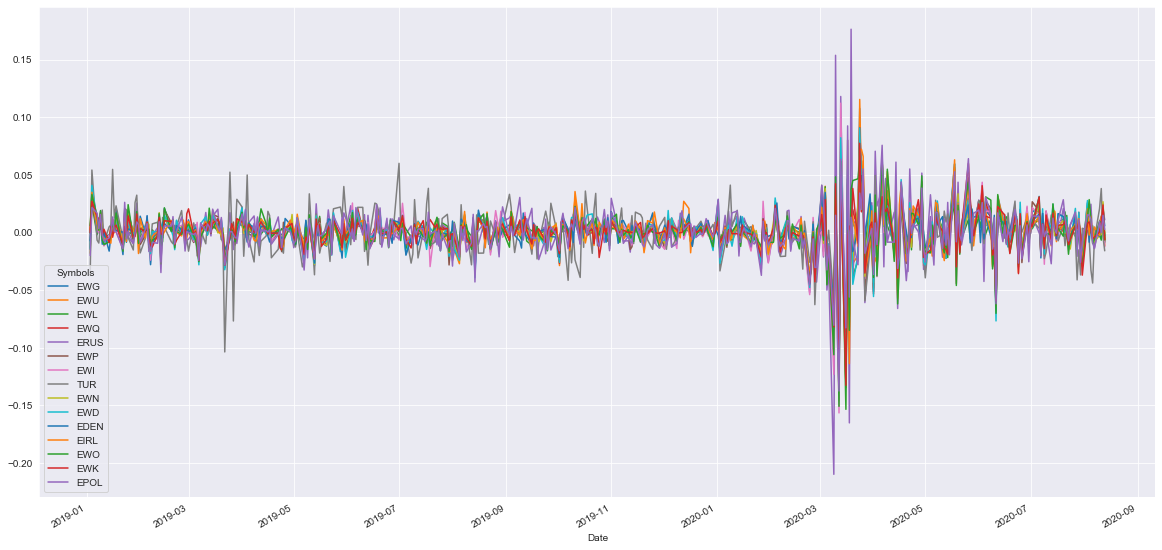

In [2]:
#Taking a glance at the chart for our currency conversion rates in question (PERCENT CHANGE)
etf_data_pct_change = etf_data.pct_change() #calculating the percent change of the equity over the period
etf_data_pct_change.plot(grid=True, figsize=(20, 10));

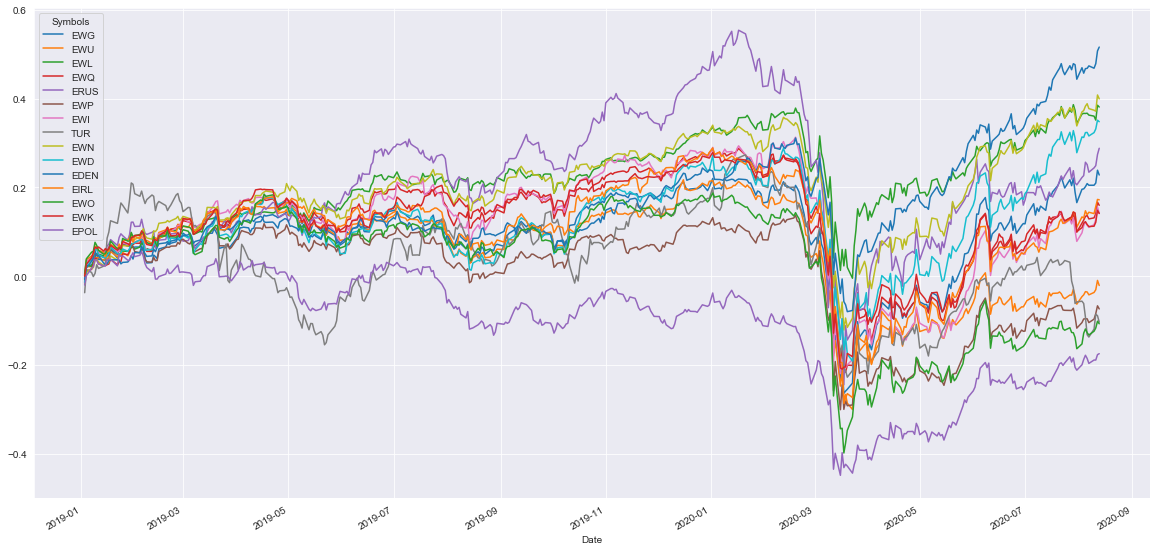

In [3]:
#Taking a look at cumulative returns
cumulative_returns = ((1 + etf_data_pct_change).cumprod() - 1) #calculating the cumulative returns of the equity over the period
cumulative_returns.plot(figsize = (20,10))

### 30/90d Rolling Averages [Germany/UK/France/Russia]

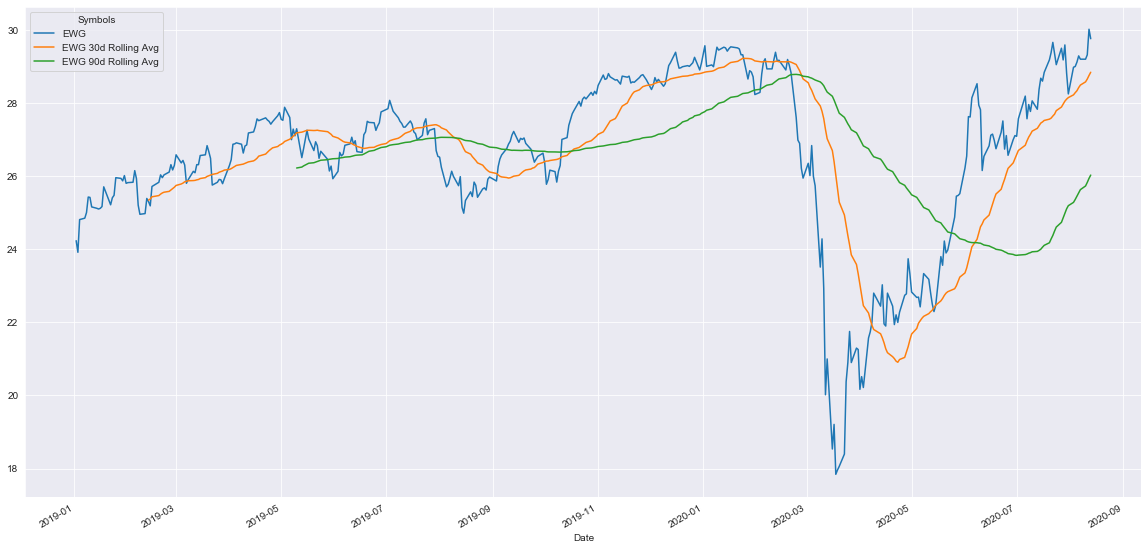

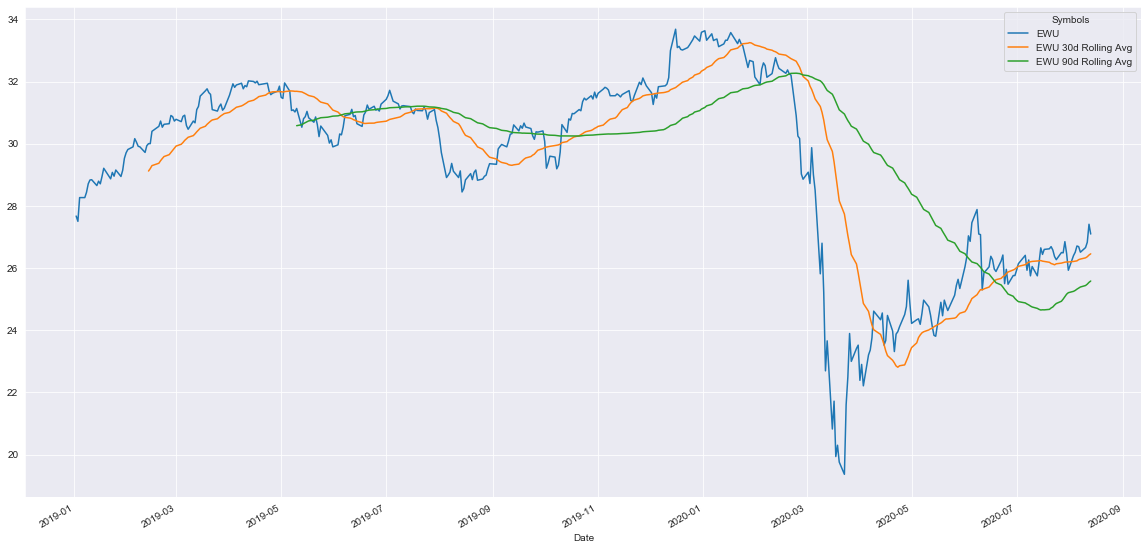

In [4]:
#Calculating 30 & 90 day rolling averages 

#Germany (EWG)
etf_data['EWG 30d Rolling Avg'] = np.round(etf_data['EWG'].rolling(window=30).mean(), 5) #30d rolling avg
etf_data['EWG 90d Rolling Avg'] = np.round(etf_data['EWG'].rolling(window=90).mean(), 5) #90d rolling avg
etf_data[['EWG', 'EWG 30d Rolling Avg', 'EWG 90d Rolling Avg']].plot(figsize=(20,10)) #plotting

#UK (EWU)
etf_data['EWU 30d Rolling Avg'] = np.round(etf_data['EWU'].rolling(window=30).mean(), 5) #30d rolling avg
etf_data['EWU 90d Rolling Avg'] = np.round(etf_data['EWU'].rolling(window=90).mean(), 5) #90d rolling avg
etf_data[['EWU', 'EWU 30d Rolling Avg', 'EWU 90d Rolling Avg']].plot(figsize=(20,10)) #plotting

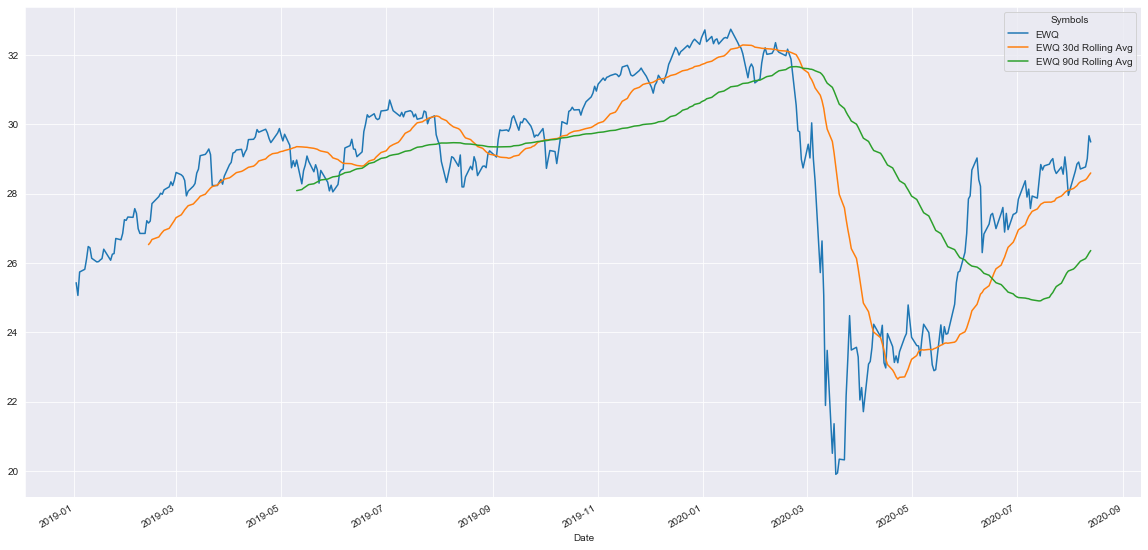

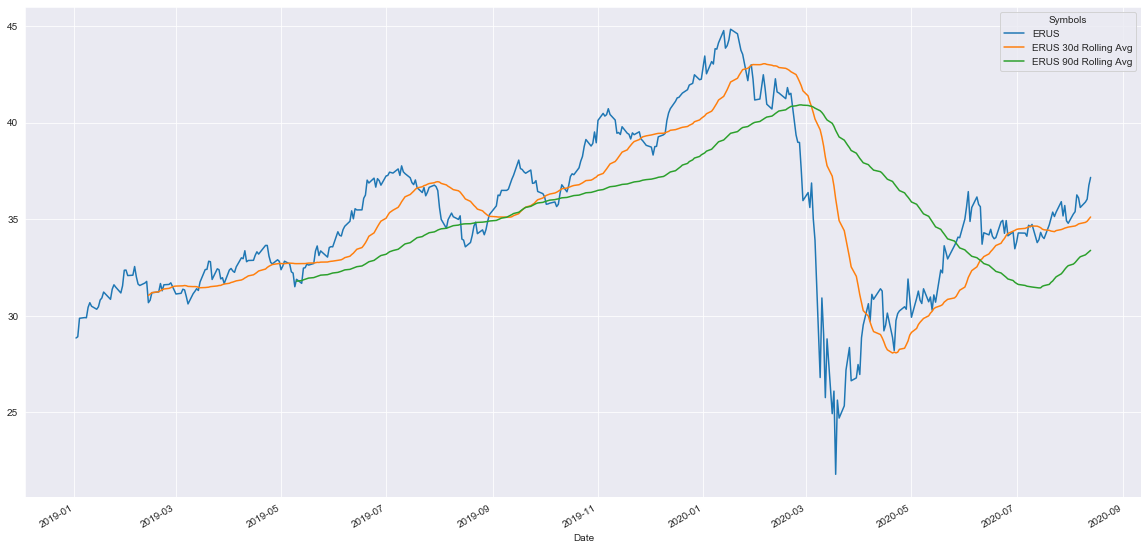

In [5]:
#France (EWQ)
etf_data['EWQ 30d Rolling Avg'] = np.round(etf_data['EWQ'].rolling(window=30).mean(), 5) #30d rolling avg
etf_data['EWQ 90d Rolling Avg'] = np.round(etf_data['EWQ'].rolling(window=90).mean(), 5) #90d rolling avg
etf_data[['EWQ', 'EWQ 30d Rolling Avg', 'EWQ 90d Rolling Avg']].plot(figsize=(20,10)) #plotting

#Russia (ERUS)
etf_data['ERUS 30d Rolling Avg'] = np.round(etf_data['ERUS'].rolling(window=30).mean(), 5) #30d rolling avg
etf_data['ERUS 90d Rolling Avg'] = np.round(etf_data['ERUS'].rolling(window=90).mean(), 5) #90d rolling avg
etf_data[['ERUS', 'ERUS 30d Rolling Avg', 'ERUS 90d Rolling Avg']].plot(figsize=(20,10)) #plotting

### 30/90d Cumulative Return Rolling Averages [Germany/UK/France/Russia]

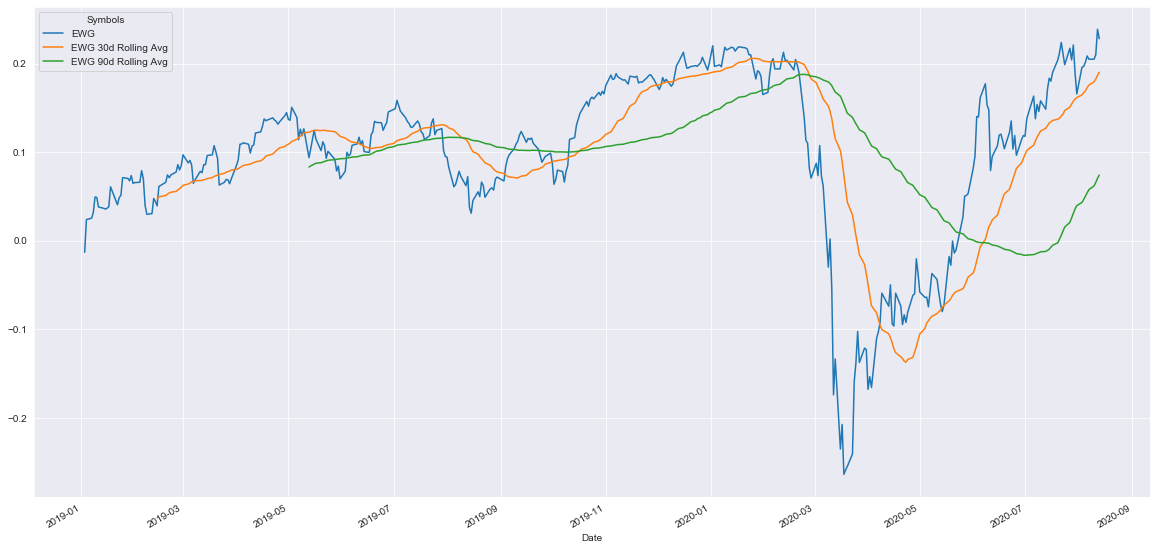

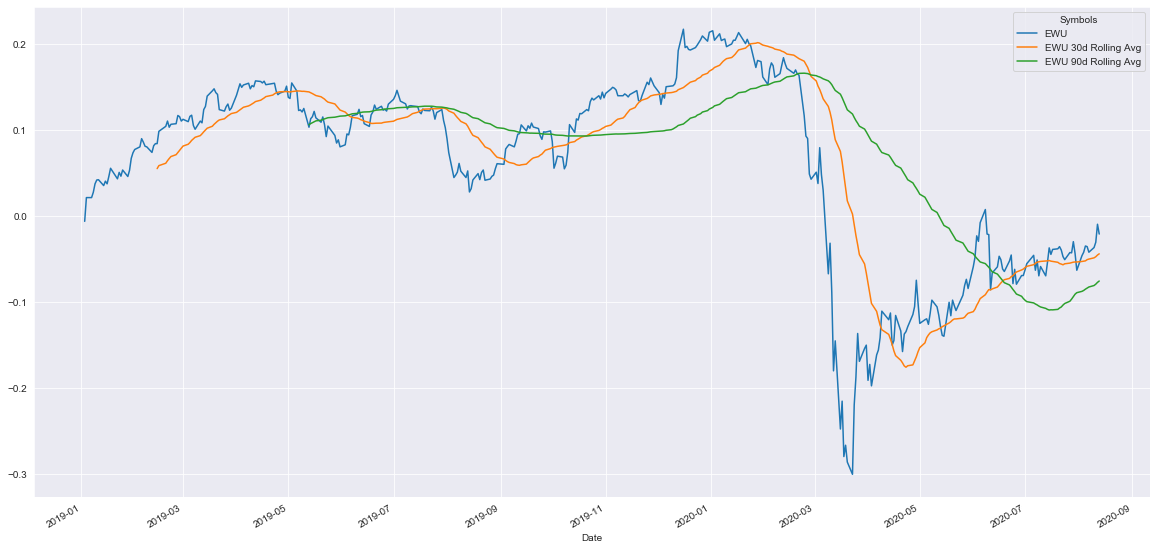

In [6]:
#Calculating 30 & 90 day rolling averages for cumulative returns

#Germany (EWG)
cumulative_returns['EWG 30d Rolling Avg'] = np.round(cumulative_returns['EWG'].rolling(window=30).mean(), 5) #30d rolling avg
cumulative_returns['EWG 90d Rolling Avg'] = np.round(cumulative_returns['EWG'].rolling(window=90).mean(), 5) #90d rolling avg
cumulative_returns[['EWG', 'EWG 30d Rolling Avg', 'EWG 90d Rolling Avg']].plot(figsize=(20,10)) 

#UK (EWU)
cumulative_returns['EWU 30d Rolling Avg'] = np.round(cumulative_returns['EWU'].rolling(window=30).mean(), 5) #30d rolling avg
cumulative_returns['EWU 90d Rolling Avg'] = np.round(cumulative_returns['EWU'].rolling(window=90).mean(), 5) #90d rolling avg
cumulative_returns[['EWU', 'EWU 30d Rolling Avg', 'EWU 90d Rolling Avg']].plot(figsize=(20,10)) 

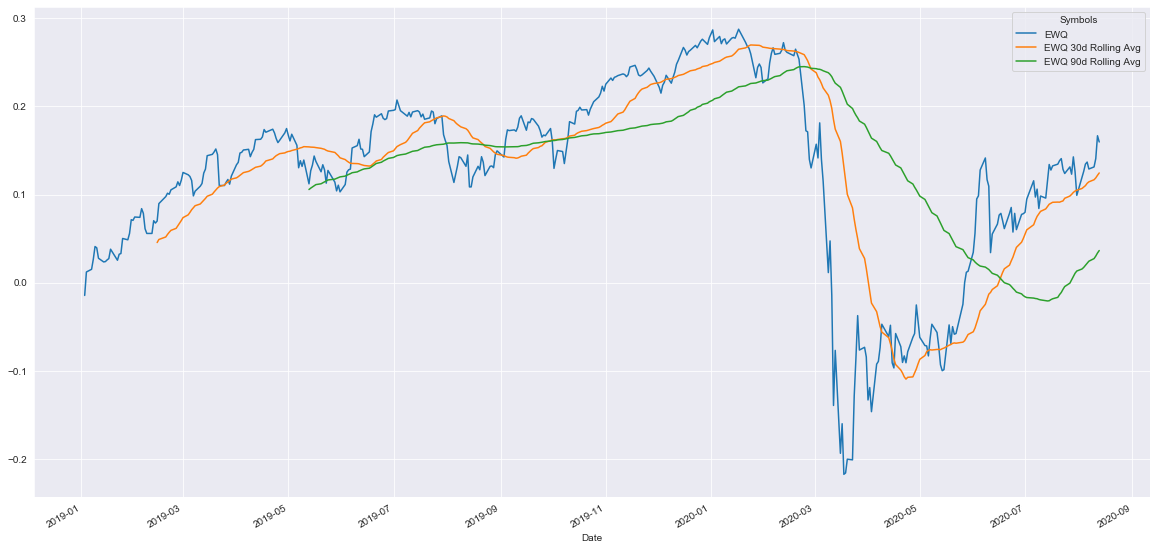

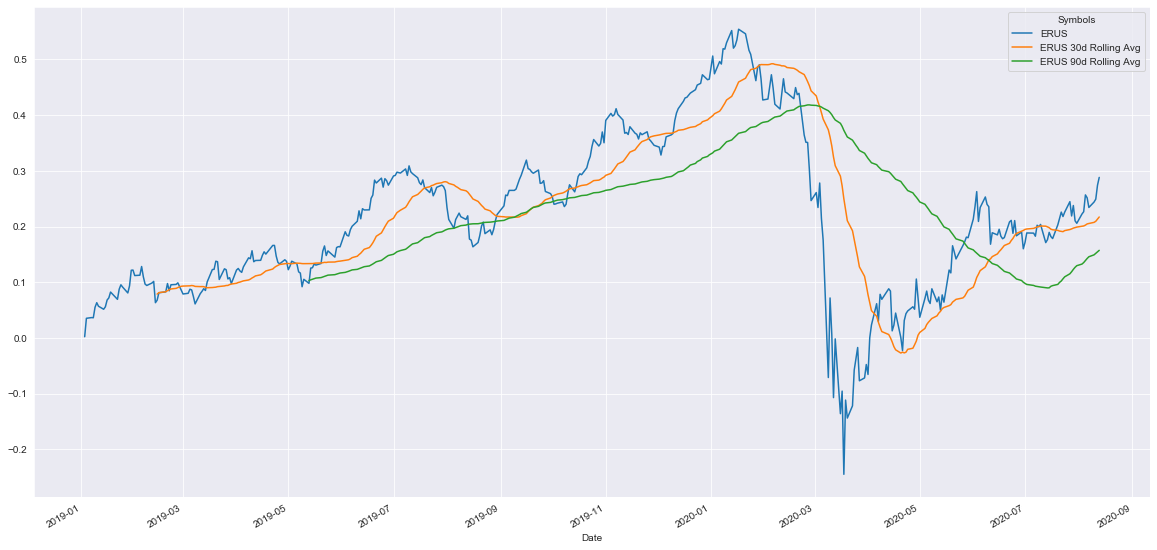

In [7]:
#Calculating 30 & 90 day rolling averages for cumulative returns

#France (EWQ)
cumulative_returns['EWQ 30d Rolling Avg'] = np.round(cumulative_returns['EWQ'].rolling(window=30).mean(), 5) #30d rolling avg
cumulative_returns['EWQ 90d Rolling Avg'] = np.round(cumulative_returns['EWQ'].rolling(window=90).mean(), 5) #90d rolling avg
cumulative_returns[['EWQ', 'EWQ 30d Rolling Avg', 'EWQ 90d Rolling Avg']].plot(figsize=(20,10)) 

#Russia (ERUS)
cumulative_returns['ERUS 30d Rolling Avg'] = np.round(cumulative_returns['ERUS'].rolling(window=30).mean(), 5) #30d rolling avg
cumulative_returns['ERUS 90d Rolling Avg'] = np.round(cumulative_returns['ERUS'].rolling(window=90).mean(), 5) #90d rolling avg
cumulative_returns[['ERUS', 'ERUS 30d Rolling Avg', 'ERUS 90d Rolling Avg']].plot(figsize=(20,10)) 

### Determining the Overall Return & Volatility of Each Nation's ETF

In [8]:
#EWG = Germany, EWU = UK, EWL = Switzerland, EWQ = France, ERUS = Russia, EWP = Spain, EWI = Italy, TUR = Turkey,
    #EWN = Netherlands, EWD = Sweden, EDEN = Denmark, EIRL = Ireland, EWO = Austria, EWK = Belgium, EPOL = Poland

#Germany (EWG)
#Return
etf_data['EWG Return'] = np.log(etf_data['EWG']/etf_data['EWG'].shift(1))
#30d moving volatility 
etf_data['EWG Mov_Volatility'] = etf_data['EWG'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#UK (EWU)
#Return
etf_data['EWU Return'] = np.log(etf_data['EWU']/etf_data['EWU'].shift(1))
#30d moving volatility 
etf_data['EWU Mov_Volatility'] = etf_data['EWU'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#Switzerland (EWL)
#Return
etf_data['EWL Return'] = np.log(etf_data['EWL']/etf_data['EWL'].shift(1))
#30d moving volatility 
etf_data['EWL Mov_Volatility'] = etf_data['EWL'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#France (EWQ)
#Return
etf_data['EWQ Return'] = np.log(etf_data['EWQ']/etf_data['EWQ'].shift(1))
#30d moving volatility 
etf_data['EWQ Mov_Volatility'] = etf_data['EWQ'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#Russia (ERUS)
#Return
etf_data['ERUS Return'] = np.log(etf_data['ERUS']/etf_data['ERUS'].shift(1))
#30d moving volatility 
etf_data['ERUS Mov_Volatility'] = etf_data['ERUS'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#Spain (EWP)
#Return
etf_data['EWP Return'] = np.log(etf_data['EWP']/etf_data['EWP'].shift(1))
#30d moving volatility 
etf_data['EWP Mov_Volatility'] = etf_data['EWP'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#Italy (EWI)
#Return
etf_data['EWI Return'] = np.log(etf_data['EWI']/etf_data['EWI'].shift(1))
#30d moving volatility 
etf_data['EWI Mov_Volatility'] = etf_data['EWI'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#Turkey (TUR)
#Return
etf_data['TUR Return'] = np.log(etf_data['TUR']/etf_data['TUR'].shift(1))
#30d moving volatility 
etf_data['TUR Mov_Volatility'] = etf_data['TUR'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#Netherlands (EWN)
#Return
etf_data['EWN Return'] = np.log(etf_data['EWN']/etf_data['EWN'].shift(1))
#30d moving volatility 
etf_data['EWN Mov_Volatility'] = etf_data['EWN'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#Sweden (EWD)
#Return
etf_data['EWD Return'] = np.log(etf_data['EWD']/etf_data['EWD'].shift(1))
#30d moving volatility 
etf_data['EWD Mov_Volatility'] = etf_data['EWD'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#Denmark (EDEN)
#Return
etf_data['EDEN Return'] = np.log(etf_data['EDEN']/etf_data['EDEN'].shift(1))
#30d moving volatility 
etf_data['EDEN Mov_Volatility'] = etf_data['EDEN'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#Ireland (EIRL)
#Return
etf_data['EIRL Return'] = np.log(etf_data['EIRL']/etf_data['EIRL'].shift(1))
#30d moving volatility 
etf_data['EIRL Mov_Volatility'] = etf_data['EIRL'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

In [9]:
#Examining df
etf_data.info()
etf_data.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 408 entries, 2019-01-02 to 2020-08-13
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EWG                   408 non-null    float64
 1   EWU                   408 non-null    float64
 2   EWL                   408 non-null    float64
 3   EWQ                   408 non-null    float64
 4   ERUS                  408 non-null    float64
 5   EWP                   408 non-null    float64
 6   EWI                   408 non-null    float64
 7   TUR                   408 non-null    float64
 8   EWN                   408 non-null    float64
 9   EWD                   408 non-null    float64
 10  EDEN                  408 non-null    float64
 11  EIRL                  408 non-null    float64
 12  EWO                   408 non-null    float64
 13  EWK                   408 non-null    float64
 14  EPOL                  408 non-null    float64
 15  EWG 

Symbols,EWG,EWU,EWL,EWQ,ERUS,EWP,EWI,TUR,EWN,EWD,...,TUR Return,TUR Mov_Volatility,EWN Return,EWN Mov_Volatility,EWD Return,EWD Mov_Volatility,EDEN Return,EDEN Mov_Volatility,EIRL Return,EIRL Mov_Volatility
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-07,29.200001,26.510000,41.099998,28.709999,35.610001,22.959999,25.450001,19.760000,34.950001,34.860001,...,-0.006054,6.376635,-0.007979,4.340164,-0.006006,7.886232,0.003815,15.832132,0.004863,6.979986
2020-08-10,29.200001,26.660000,41.029999,28.770000,35.889999,23.160000,25.590000,20.170000,34.860001,35.060001,...,0.020537,6.895437,-0.002578,3.940436,0.005721,7.497653,-0.003569,14.873737,-0.002672,6.721581
2020-08-11,29.320000,26.830000,40.759998,29.010000,36.040001,23.480000,25.850000,20.940001,34.799999,35.279999,...,0.037465,7.079208,-0.001723,3.543995,0.006255,7.179878,0.006880,14.027916,0.013767,6.729485
2020-08-12,30.020000,27.410000,41.770000,29.670000,36.759998,23.930000,26.500000,20.860001,35.730000,35.799999,...,-0.003828,7.270663,0.026373,3.359972,0.014632,6.840773,0.019279,13.443245,0.013816,6.815453
2020-08-13,29.760000,27.094999,41.650002,29.490000,37.166500,23.750000,26.170000,20.530001,35.509998,35.709999,...,-0.015946,7.511884,-0.006176,3.131455,-0.002517,6.504115,0.005748,12.950847,-0.000710,6.833255


### Visualizing Trends [Germany/UK/France/Russia]

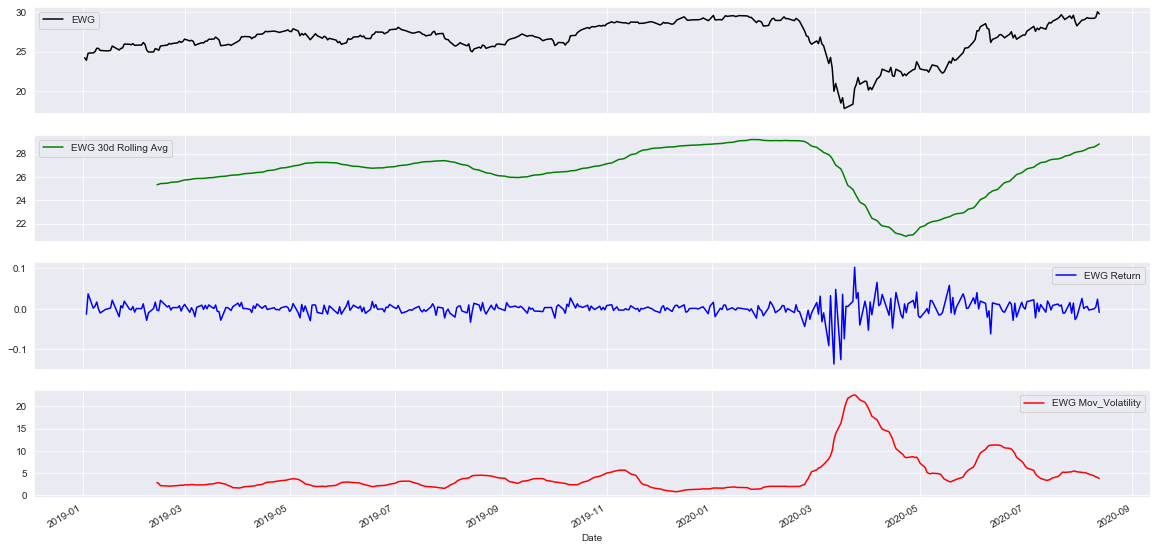

In [10]:
#Visualizing the results

#Germany (EWG)
etf_data[['EWG','EWG 30d Rolling Avg','EWG Return','EWG Mov_Volatility']].plot(subplots=True, style=['black','green','blue','red'],figsize=(20, 10));

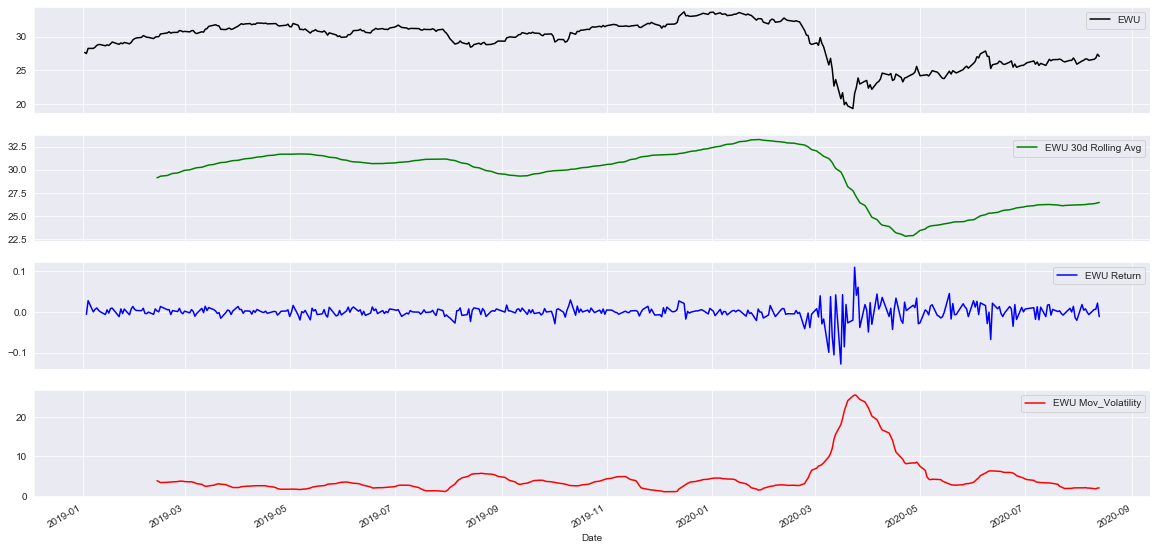

In [11]:
#UK (EWU)
etf_data[['EWU','EWU 30d Rolling Avg','EWU Return','EWU Mov_Volatility']].plot(subplots=True, style=['black','green','blue','red'],figsize=(20, 10));

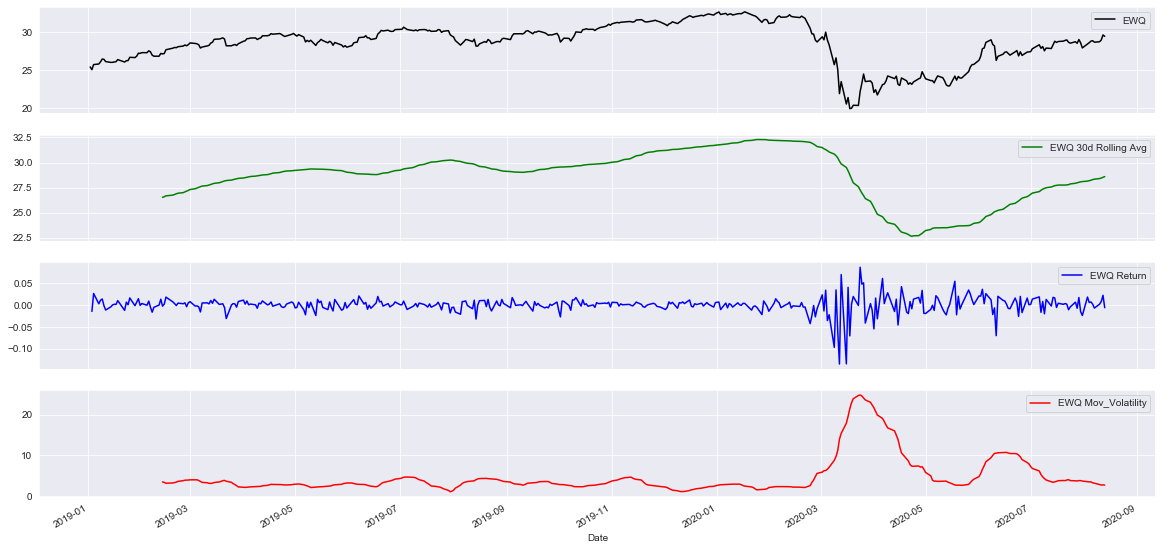

In [12]:
#France (EWQ)
etf_data[['EWQ','EWQ 30d Rolling Avg','EWQ Return','EWQ Mov_Volatility']].plot(subplots=True, style=['black','green','blue','red'],figsize=(20, 10));

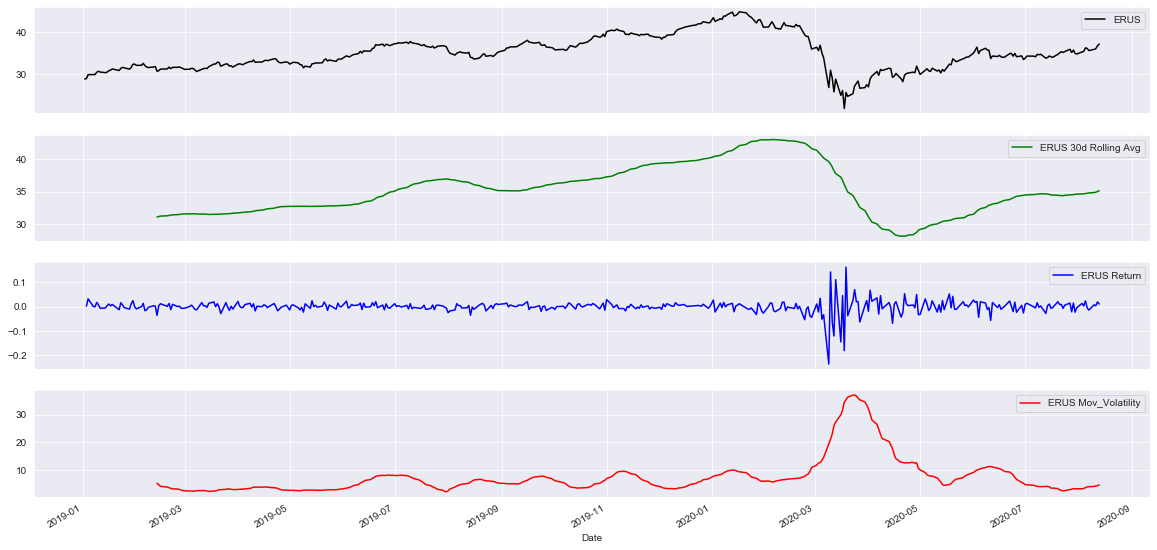

In [13]:
#Russia (ERUS)
etf_data[['ERUS','ERUS 30d Rolling Avg','ERUS Return','ERUS Mov_Volatility']].plot(subplots=True, style=['black','green','blue','red'],figsize=(20, 10));

### Optimizing ETF Portfolio Weights

In [14]:
#EWG = Germany, EWU = UK, EWL = Switzerland, EWQ = France, ERUS = Russia, EWP = Spain, EWI = Italy, TUR = Turkey,
#EWN = Netherlands, EWD = Sweden, EDEN = Denmark, EIRL = Ireland, EWO = Austria, EWK = Belgium, EPOL = Poland
         
#Defining the ETFS we're building a portfolio out of
etf_tickers = ['EWG','EWU','EWL','EWQ','ERUS','EWP','EWI','TUR','EWN','EWD','EDEN','EIRL','EWO','EWK','EPOL']

#Calculating number of currencies we're dealing with
size_portfolio = len(etf_tickers)

#Getting the most up to date data we can
today = date.today() #This function automatically updates with today's data


#Pulling the timeseries data directly from yahoo finance into a dataframe
etf_data= data.DataReader(etf_tickers, 
                       start='2019-1-1', #selecting the starting date
                       end = today, #charting up to today's date
                       data_source='yahoo')['Adj Close'] #obtaining price at close

#Calculating returns
etf_returns = np.log(etf_data/etf_data.shift(1))

#Calculating average return over a year's worth of trading days
etf_returns.mean()*253

#Calculating covariance over a years's worth of trading days
etf_returns.cov()*253

Symbols,EWG,EWU,EWL,EWQ,ERUS,EWP,EWI,TUR,EWN,EWD,EDEN,EIRL,EWO,EWK,EPOL
Symbols,,,,,,,,,,,,,,,
EWG,0.088148,0.079642,0.060123,0.086077,0.093958,0.085299,0.087681,0.059062,0.072766,0.087355,0.056057,0.078705,0.089115,0.072303,0.075153
EWU,0.079642,0.083078,0.059490,0.081375,0.096036,0.080901,0.080845,0.055733,0.068934,0.084721,0.053539,0.076606,0.081505,0.067705,0.069594
EWL,0.060123,0.059490,0.053853,0.061880,0.074482,0.062567,0.063983,0.041279,0.054023,0.065719,0.044352,0.054781,0.060043,0.051889,0.055329
EWQ,0.086077,0.081375,0.061880,0.089877,0.095102,0.087679,0.090640,0.059699,0.072737,0.088131,0.057098,0.080810,0.090491,0.074558,0.076048
ERUS,0.093958,0.096036,0.074482,0.095102,0.185855,0.100272,0.099090,0.074397,0.084559,0.103488,0.062061,0.089740,0.103600,0.075436,0.090492
EWP,0.085299,0.080901,0.062567,0.087679,0.100272,0.096841,0.093239,0.060654,0.072131,0.088921,0.055828,0.078954,0.090859,0.073376,0.078855
EWI,0.087681,0.080845,0.063983,0.090640,0.099090,0.093239,0.104576,0.059212,0.073403,0.090000,0.057020,0.078355,0.094618,0.078218,0.078740
TUR,0.059062,0.055733,0.041279,0.059699,0.074397,0.060654,0.059212,0.112457,0.051619,0.060916,0.038267,0.054955,0.060621,0.049658,0.060870
EWN,0.072766,0.068934,0.054023,0.072737,0.084559,0.072131,0.073403,0.051619,0.067245,0.075509,0.049617,0.066781,0.073687,0.059908,0.064329


### Calculating Expected Return, Var & Vol for One Possible Set of ETF Portfolio Weights

In [15]:
#Creating random position weights
weights = np.random.random(size_portfolio) #creating random position percentages
weights = weights/np.sum(weights) #scaling weights
weights

array([0.00311786, 0.11128263, 0.17515534, 0.03281376, 0.0033638 ,
       0.0802941 , 0.05036347, 0.11849506, 0.13030532, 0.03051305,
       0.12322044, 0.02140487, 0.05587099, 0.03945206, 0.02434725])

In [16]:
#Calculating expected portfolio return with random weights
np.sum(etf_returns.mean()*weights)*253

0.09329245072125233

In [17]:
#Calculating expected portfolio variance with random weights

#Taking the dot product of the transpose weights array and the portfolio returns matrix
np.dot(weights.T, np.dot(etf_returns.cov() * 253, weights))

0.06282081653540927

In [18]:
#Calculating expected portfolio volatility with random weights
np.sqrt(np.dot(weights.T, np.dot(etf_returns.cov() * 253, weights)))

0.25064081179131475

### Calculating Expected Return, Var & Vol for Ten Thousand [10000] Potential ETF Portfolios Via Monte Carlo

In [19]:
#Creating empty arrays to store our values
pred_returns = [] 
pred_volatility = []

#Defining a for loop to perform the calculations we did above but this time we'll do it 5000 times
#Calculations and code are the exact same as above just now a for loop performs them for us over and over again
#Every iteration np.random will produce a new randomly weighted portfolio for us to try
for i in range (10000):
    weights = np.random.random(size_portfolio)
    weights /= np.sum(weights)
    pred_returns.append(np.sum(etf_returns.mean() * weights) * 253)
    pred_volatility.append(np.sqrt(np.dot(weights.T, np.dot(etf_returns.cov() * 253, weights))))

#Appending our results to the arrays we created above
pred_returns = np.array(pred_returns)
pred_volatility = np.array(pred_volatility)

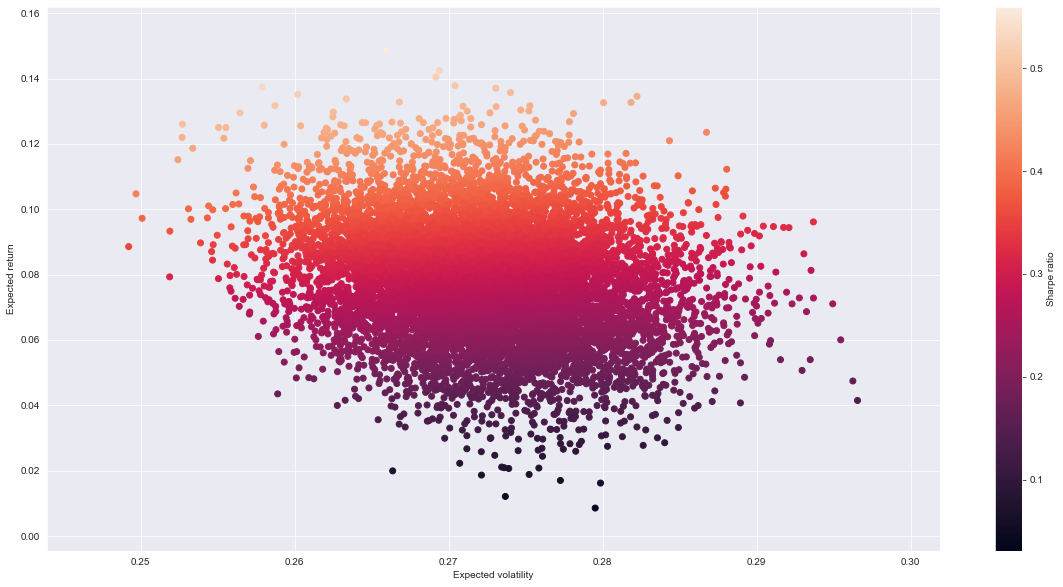

In [20]:
#Visualizing our results
plt.figure(figsize=(20, 10))
plt.scatter(pred_volatility, pred_returns, c = pred_returns / pred_volatility, marker='o')
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio');

### Optimizing Portfolio Weightings Mathematically

In [21]:
#This function takes in an array of portfolio weights as an input and returns an array of the predicted returns, voltatility
#and Sharpe ratios (automating the same calculations done above)
def stats(weights):
    weights = np.array(weights)
    pred_returns = np.sum(etf_returns.mean() * weights) * 253
    pred_volatility = np.sqrt(np.dot(weights.T, np.dot(etf_returns.cov() * 253, weights)))
    return np.array([pred_returns,pred_volatility,pred_returns / pred_volatility])

In [22]:
#Creating a function to minimize the Sharpe ratio
def min_sharpe_func(weights):
    return -stats(weights)[2]

#Creating a list of constraints for the optimization 
constraints = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

#Creating a list of bounds for the optimiation
bounds = tuple((0, 1) for x in range(size_portfolio))

#Scaling our portfolio weights and creating a nice array
scaled = size_portfolio * [1./ size_portfolio,]

#Running the optimization function for Sharpe ratio
opts_Sharpe = sco.minimize(min_sharpe_func, scaled, method='SLSQP',
                       bounds=bounds, constraints=constraints)

In [23]:
#Extracting optimal weights rounded to 3 decimal places
print('OPTIMAL ETF PORTFOLIO WEIGHTS FOR SHARPE RATIO [EWG,EWU,EWL,EWQ,ERUS,EWP,EWI,TUR,EWN,EWD,EDEN,EIRL,EWO,EWK,EPOL]')
print((opts_Sharpe['x']).round(5))

#Extracting pred returns, volatility & Sharpe ratio using our stats() function
print('PREDICTED RESULTS FOR OPTIMAL SHARPE RATIO PORTFOLIO WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]')
print(stats(opts_Sharpe['x'].round(3)))

OPTIMAL ETF PORTFOLIO WEIGHTS FOR SHARPE RATIO [EWG,EWU,EWL,EWQ,ERUS,EWP,EWI,TUR,EWN,EWD,EDEN,EIRL,EWO,EWK,EPOL]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
PREDICTED RESULTS FOR OPTIMAL SHARPE RATIO PORTFOLIO WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]
[0.25872569 0.22311123 1.15962647]


In [24]:
#Repeating for variance
def min_variance_func(weights):
    return stats(weights)[1]**2

#Optimizing using same contraints and bounds as before
opts_variance = sco.minimize(min_variance_func, size_portfolio * [1. / size_portfolio,], method='SLSQP',
                       bounds=bounds, constraints=constraints)

In [25]:
#Extracting optimal weights rounded to 3 decimal places
print('OPTIMAL ETF PORTFOLIO WEIGHTS FOR OPTIMAL VARIANCE [EWG,EWU,EWL,EWQ,ERUS,EWP,EWI,TUR,EWN,EWD,EDEN,EIRL,EWO,EWK,EPOL]')
print((opts_variance['x']).round(5))

#Extracting pred returns, volatility & Sharpe ratio using our created stats() function
print('PREDICTED OUTCOMES FOR MINIMAL OPTIMAL VARIANCE PORTFOLIO WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]')
print(stats(opts_variance['x'].round(3)))

OPTIMAL ETF PORTFOLIO WEIGHTS FOR OPTIMAL VARIANCE [EWG,EWU,EWL,EWQ,ERUS,EWP,EWI,TUR,EWN,EWD,EDEN,EIRL,EWO,EWK,EPOL]
[0.      0.      0.3014  0.      0.      0.      0.      0.10577 0.
 0.      0.59283 0.      0.      0.      0.     ]
PREDICTED OUTCOMES FOR MINIMAL OPTIMAL VARIANCE PORTFOLIO WEIGHTS [RETURN, VOLATILITY, SHARPE RATIO]
[0.20672883 0.21662213 0.95432926]


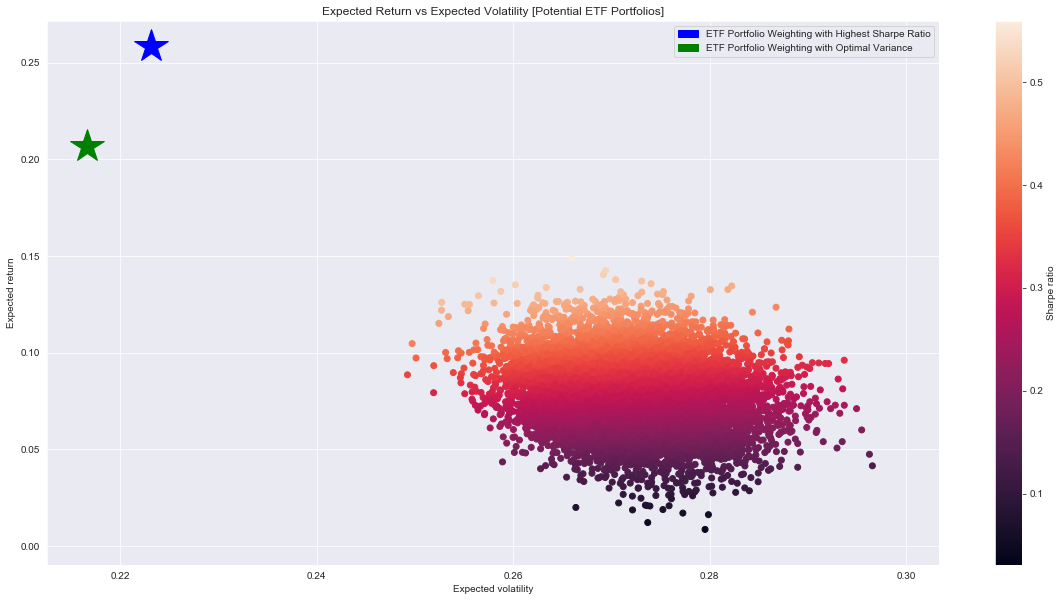

In [26]:
#Visualizing our results
plt.figure(figsize=(20, 10))

#Plotting potential random portfolio compositions
plt.scatter(pred_volatility, pred_returns, c = pred_returns / pred_volatility, marker='o')

#Plotting porftolio with highest Sharpe ratio (Blue)
plt.plot(stats(opts_Sharpe['x'])[1], stats(opts_Sharpe['x'])[0],
         'b*', markersize=35.0)

#Plotting minimum variance portfolio (Green)
plt.plot(stats(opts_variance['x'])[1], stats(opts_variance['x'])[0],
         'g*', markersize=35.0)

#Creating legend
import matplotlib.patches as mpatches
blue = mpatches.Patch(color='b', label='ETF Portfolio Weighting with Highest Sharpe Ratio')
green = mpatches.Patch(color='g', label='ETF Portfolio Weighting with Optimal Variance')
plt.legend(handles=[blue,green])

#Creating labels
plt.title('Expected Return vs Expected Volatility [Potential ETF Portfolios]')
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio');